# Example usage of Multi-agent ChemGraph

## Initiate the ChemGraph agent

In [29]:
from chemgraph.agent.llm_agent import ChemGraph

workflow_type = "multi_agent"
cg = ChemGraph(model_name='gpt-4o-mini', workflow_type = workflow_type, structured_output=False, return_option="state")


2025-11-19 23:29:43,511 - chemgraph.tools.openai_loader - INFO - Loading OpenAI model: gpt-4o-mini


INFO:chemgraph.tools.openai_loader:Loading OpenAI model: gpt-4o-mini


2025-11-19 23:29:43,519 - chemgraph.tools.openai_loader - INFO - Requested model: gpt-4o-mini


INFO:chemgraph.tools.openai_loader:Requested model: gpt-4o-mini


2025-11-19 23:29:43,521 - chemgraph.tools.openai_loader - INFO - OpenAI model loaded successfully


INFO:chemgraph.tools.openai_loader:OpenAI model loaded successfully


2025-11-19 23:29:43,522 - chemgraph.graphs.multi_agent - INFO - Constructing multi-agent graph


INFO:chemgraph.graphs.multi_agent:Constructing multi-agent graph


2025-11-19 23:29:43,533 - chemgraph.graphs.multi_agent - INFO - Graph construction completed


INFO:chemgraph.graphs.multi_agent:Graph construction completed


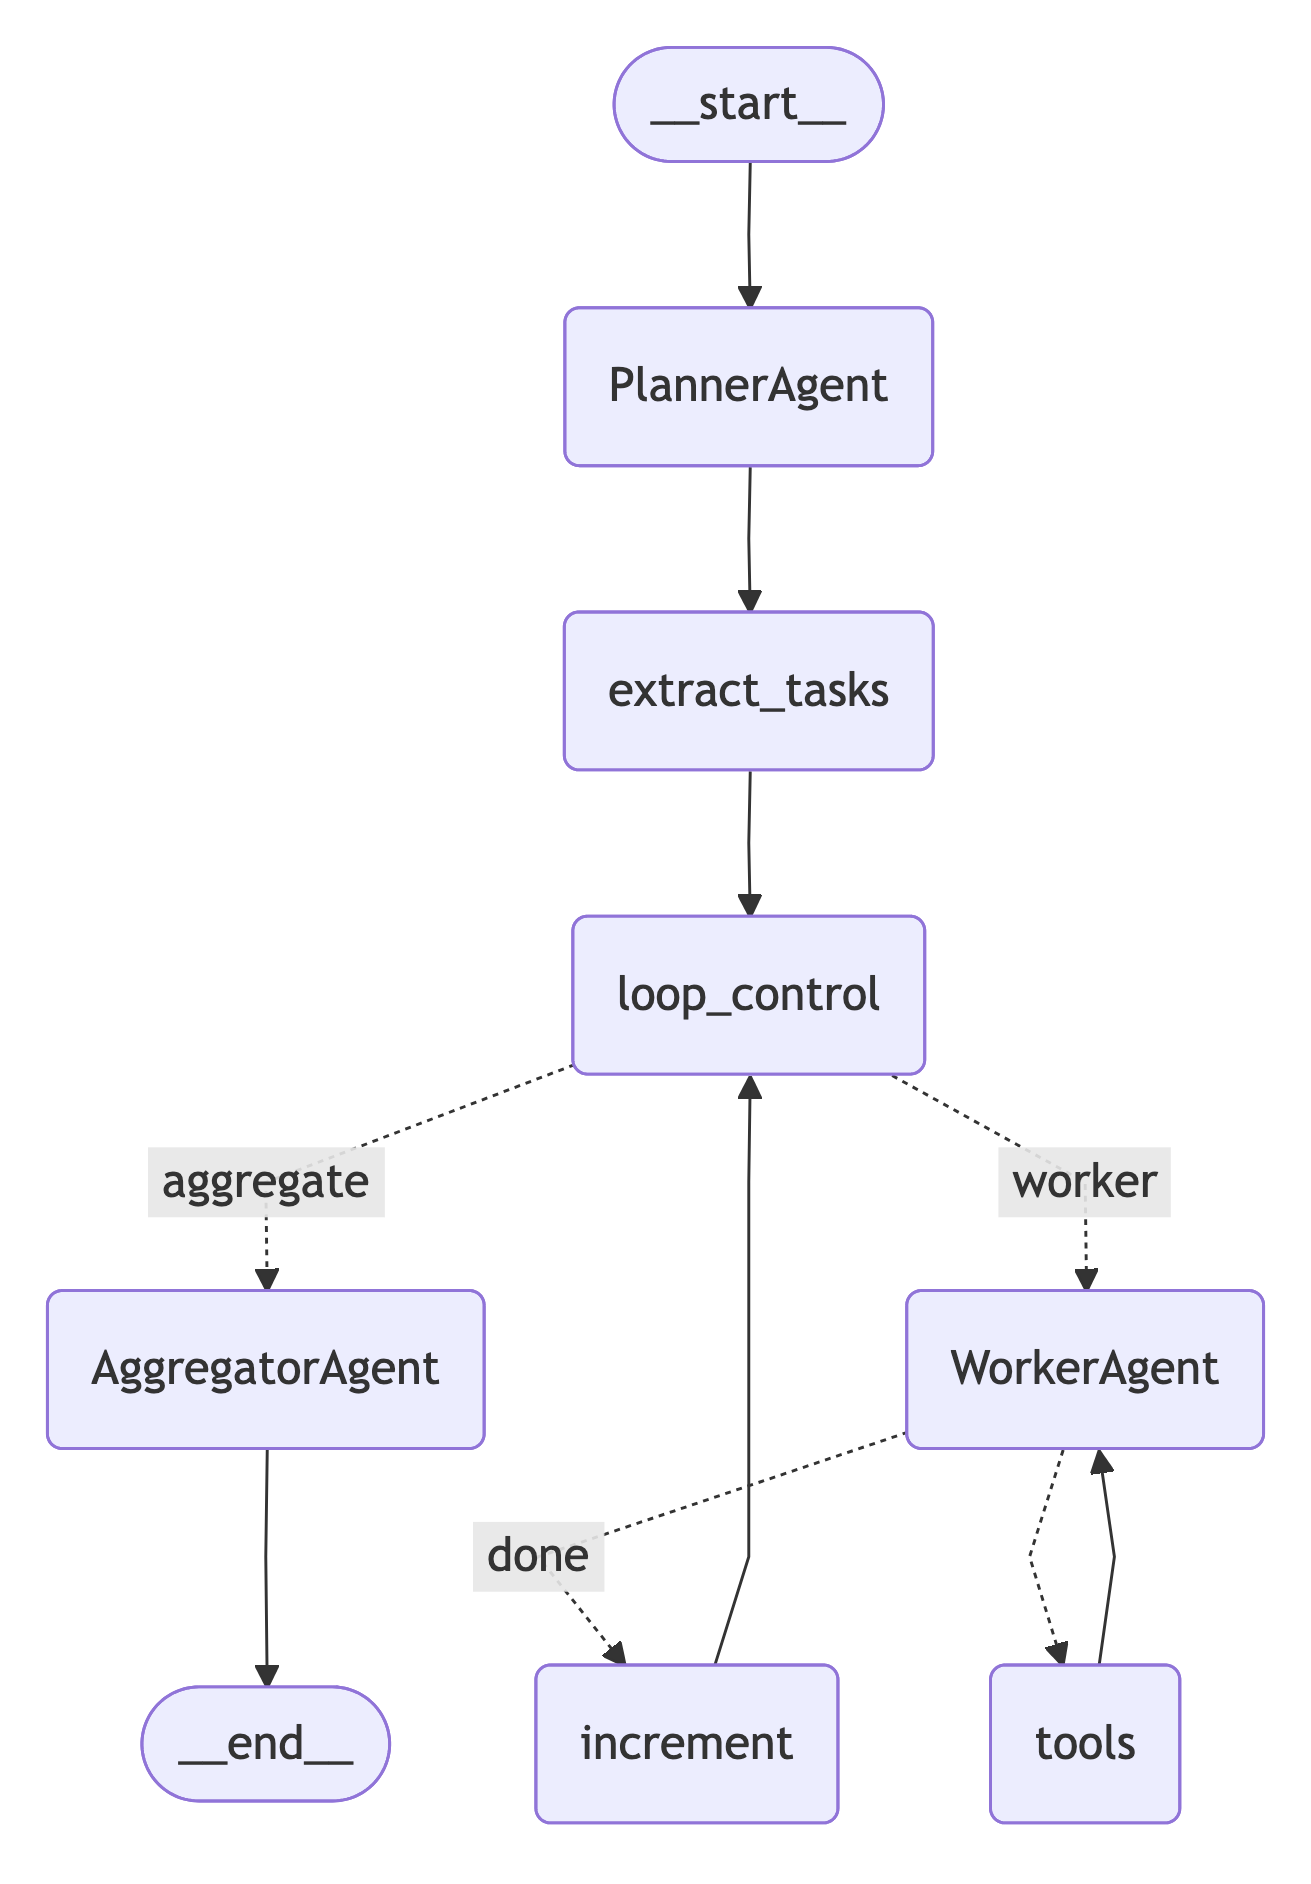

In [23]:
cg.visualize()

In [24]:
query_1 = "What are the SMILES string of caffein, carbon monoxide, hydrogen peroxide and squaric acid"
result_1 = await cg.run(query_1, config={"configurable": {"thread_id": "1"}})

================================ Human Message =================================

What are the SMILES string of caffein, carbon monoxide, hydrogen peroxide and squaric acid
================================ Human Message =================================

{"worker_tasks":[{"task_index":1,"prompt":"Calculate the SMILES string of caffeine (C8H10N4O2)."},{"task_index":2,"prompt":"Calculate the SMILES string of carbon monoxide (CO)."},{"task_index":3,"prompt":"Calculate the SMILES string of hydrogen peroxide (H2O2)."},{"task_index":4,"prompt":"Calculate the SMILES string of squaric acid (C4H4O4)."}]}
[Worker worker_0] Now processing task: 'Calculate the SMILES string of caffeine (C8H10N4O2).'
[Worker worker_1] Now processing task: 'Calculate the SMILES string of carbon monoxide (CO).'
[Worker worker_2] Now processing task: 'Calculate the SMILES string of hydrogen peroxide (H2O2).'
[Worker worker_3] Now processing task: 'Calculate the SMILES string of squaric acid (C4H4O4).'
================

## Inspect message history of an executor (worker_0)

In [27]:
for idx, mess in enumerate(result_1["worker_channel"]["worker_0"]):
    print(f"MESSAGE {idx}")
    print(mess)


MESSAGE 0
{'content': 'Calculate the SMILES string of caffeine (C8H10N4O2).', 'additional_kwargs': {}, 'response_metadata': {}, 'type': 'human', 'name': None, 'id': '575fc22b-4553-4f0b-8c6f-4fe2c30b1def'}
MESSAGE 1
{'content': '', 'additional_kwargs': {'refusal': None}, 'response_metadata': {'token_usage': {'completion_tokens': 19, 'prompt_tokens': 3972, 'total_tokens': 3991, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 3712}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CdrTSnkmrsqyH9t18n3lOYqb2lRTI', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, 'type': 'ai', 'name': None, 'id': 'lc_run--d47719e8-cade-40c0-b524-8fa636c80a97-0', 'tool_calls': [{'name': 'molecule_name_to_smiles', 'args': {'name': 'caffeine'}, 'id': 'call_UM0

## Second example, calculating the reaction enthalpy using MACE MP

In [31]:
# Calculate a reaction enthalpy
query_2 = "You are given a chemical reaction: 1 (Methane) + 2 (Oxygen) -> 1 (Carbon dioxide) + 2 (Water). Calculate the enthalpy for this reaction using MACE MP at 400K."
result_2 = await cg.run(query_2, config={"configurable": {"thread_id": "2"}})

================================ Human Message =================================

You are given a chemical reaction: 1 (Methane) + 2 (Oxygen) -> 1 (Carbon dioxide) + 2 (Water). Calculate the enthalpy for this reaction using MACE MP at 400K.
================================ Human Message =================================

{"worker_tasks":[{"task_index":1,"prompt":"Calculate the enthalpy of formation of methane (CH4) using mace_mp at 400K."},{"task_index":2,"prompt":"Calculate the enthalpy of formation of oxygen (O2) using mace_mp at 400K."},{"task_index":3,"prompt":"Calculate the enthalpy of formation of carbon dioxide (CO2) using mace_mp at 400K."},{"task_index":4,"prompt":"Calculate the enthalpy of formation of water (H2O) using mace_mp at 400K."}]}
[Worker worker_0] Now processing task: 'Calculate the enthalpy of formation of methane (CH4) using mace_mp at 400K.'
Using medium MPA-0 model as default MACE-MP model, to use previous (before 3.10) default model please specify 'medium' as 

/Users/tpham2/work/projects/ChemGraph/env/chemgraph_env/lib/python3.10/site-packages/mace/calculators/mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


BFGS:    3 23:30:07      -23.166949        0.000359
Enthalpy components at T = 400.00 K:
E_pot                -23.167 eV
E_ZPE                  1.183 eV
Cv_trans (0->T)        0.052 eV
Cv_rot (0->T)          0.052 eV
Cv_vib (0->T)          0.007 eV
(C_v -> C_p)           0.034 eV
-------------------------------
H                    -21.839 eV
Entropy components at T = 400.00 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0015502 eV/K        0.620 eV
S_rot              0.0004774 eV/K        0.191 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0000216 eV/K        0.009 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.000 eV
-------------------------------------------------
S                  0.0020481 eV/K        0.819 eV
Enthalpy components at T = 400.00 K:
E_pot                -23.167 eV
E_ZPE                  1.183 eV
Cv_trans (0->T)        0.052 eV
Cv_rot (0->T)          0.052 eV
Cv_vib (0->T)          0.007 eV
(C_v 

/Users/tpham2/work/projects/ChemGraph/env/chemgraph_env/lib/python3.10/site-packages/mace/calculators/mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


BFGS:    5 23:30:28       -9.381692        0.041391
BFGS:    6 23:30:28       -9.381704        0.000854
Enthalpy components at T = 400.00 K:
E_pot                 -9.382 eV
E_ZPE                  0.095 eV
Cv_trans (0->T)        0.052 eV
Cv_rot (0->T)          0.034 eV
Cv_vib (0->T)          0.001 eV
(C_v -> C_p)           0.034 eV
-------------------------------
H                     -9.165 eV
Entropy components at T = 400.00 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0016395 eV/K        0.656 eV
S_rot              0.0004836 eV/K        0.193 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0000023 eV/K        0.001 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.000 eV
-------------------------------------------------
S                  0.0021242 eV/K        0.850 eV
Enthalpy components at T = 400.00 K:
E_pot                 -9.382 eV
E_ZPE                  0.095 eV
Cv_trans (0->T)        0.052 eV
Cv_rot (0->T)    

/Users/tpham2/work/projects/ChemGraph/env/chemgraph_env/lib/python3.10/site-packages/mace/calculators/mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


BFGS:    4 23:30:58      -22.545910        0.000151
Enthalpy components at T = 400.00 K:
E_pot                -22.546 eV
E_ZPE                  0.318 eV
Cv_trans (0->T)        0.052 eV
Cv_rot (0->T)          0.034 eV
Cv_vib (0->T)          0.015 eV
(C_v -> C_p)           0.034 eV
-------------------------------
H                    -22.092 eV
Entropy components at T = 400.00 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0016807 eV/K        0.672 eV
S_rot              0.0005947 eV/K        0.238 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0000507 eV/K        0.020 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.000 eV
-------------------------------------------------
S                  0.0023250 eV/K        0.930 eV
Enthalpy components at T = 400.00 K:
E_pot                -22.546 eV
E_ZPE                  0.318 eV
Cv_trans (0->T)        0.052 eV
Cv_rot (0->T)          0.034 eV
Cv_vib (0->T)          0.015 eV
(C_v 

/Users/tpham2/work/projects/ChemGraph/env/chemgraph_env/lib/python3.10/site-packages/mace/calculators/mace.py:197: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


BFGS:    4 23:31:31      -13.786069        0.024777
BFGS:    5 23:31:31      -13.786082        0.004130
Enthalpy components at T = 400.00 K:
E_pot                -13.786 eV
E_ZPE                  0.577 eV
Cv_trans (0->T)        0.052 eV
Cv_rot (0->T)          0.052 eV
Cv_vib (0->T)          0.001 eV
(C_v -> C_p)           0.034 eV
-------------------------------
H                    -13.071 eV
Entropy components at T = 400.00 K and P = 101325.0 Pa:
                           S               T*S
S_trans (1 bar)    0.0015652 eV/K        0.626 eV
S_rot              0.0004947 eV/K        0.198 eV
S_elec             0.0000000 eV/K        0.000 eV
S_vib              0.0000015 eV/K        0.001 eV
S (1 bar -> P)    -0.0000011 eV/K       -0.000 eV
-------------------------------------------------
S                  0.0020603 eV/K        0.824 eV
Enthalpy components at T = 400.00 K:
E_pot                -13.786 eV
E_ZPE                  0.577 eV
Cv_trans (0->T)        0.052 eV
Cv_rot (0->T)    

In [34]:
#Final results from Aggregator agent
print(result_2["messages"][-1])

{'content': 'To calculate the enthalpy change for the reaction:\n\n\\[ \\text{1 CH}_4 + \\text{2 O}_2 \\rightarrow \\text{1 CO}_2 + \\text{2 H}_2\\text{O} \\]\n\nwe will use the enthalpies of formation obtained from the worker outputs:\n\n1. **Enthalpy of Formation of Methane (CH₄)**: -21.84 eV\n2. **Enthalpy of Formation of Oxygen (O₂)**: -9.17 eV (Note: O₂ is in its standard state, so its enthalpy of formation is typically considered as 0 eV, but we will use the provided value.)\n3. **Enthalpy of Formation of Carbon Dioxide (CO₂)**: -22.09 eV\n4. **Enthalpy of Formation of Water (H₂O)**: -13.07 eV\n\nUsing the formula for the reaction enthalpy:\n\n\\[\n\\Delta H = \\sum (\\text{Enthalpy of products}) - \\sum (\\text{Enthalpy of reactants})\n\\]\n\nCalculating the enthalpy of the products:\n\n- For 1 CO₂: -22.09 eV\n- For 2 H₂O: 2 × (-13.07 eV) = -26.14 eV\n\nTotal for products = -22.09 eV + (-26.14 eV) = -48.23 eV\n\nCalculating the enthalpy of the reactants:\n\n- For 1 CH₄: -21.84 e

## Inspect message history of an executor (worker_0)

In [35]:
for idx, mess in enumerate(result_1["worker_channel"]["worker_0"]):
    print(f"MESSAGE {idx}")
    print(mess)


MESSAGE 0
{'content': 'Calculate the SMILES string of caffeine (C8H10N4O2).', 'additional_kwargs': {}, 'response_metadata': {}, 'type': 'human', 'name': None, 'id': '575fc22b-4553-4f0b-8c6f-4fe2c30b1def'}
MESSAGE 1
{'content': '', 'additional_kwargs': {'refusal': None}, 'response_metadata': {'token_usage': {'completion_tokens': 19, 'prompt_tokens': 3972, 'total_tokens': 3991, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 3712}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CdrTSnkmrsqyH9t18n3lOYqb2lRTI', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, 'type': 'ai', 'name': None, 'id': 'lc_run--d47719e8-cade-40c0-b524-8fa636c80a97-0', 'tool_calls': [{'name': 'molecule_name_to_smiles', 'args': {'name': 'caffeine'}, 'id': 'call_UM0